In [1]:
library(IRdisplay)
display_html(file = "script.html")
datapath = 'https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/data/econometrics/'
toggle <- function() {display_html('<a href="#" onclick="code_toggle(this); return false;">show code</a>')}

In [9]:
library(car)
library(lmtest)
library(sandwich)
library(kableExtra)
library(multiwayvcov)

# Least Square Regression

We have a set of observations $(y_i, \mathbf{x}_i)$, $i \in N = 1, \ldots, n$, where $\mathbf{x}_i = (x_{i1} = 1, x_{i2}, \ldots, x_{ik})^\top$.

<div class="alert alert-block alert-success">
<b>Note:</b> We include the constant term into $\mathbf{x}$ to simplify the notation of linear regression model. There are $n$ observations and each observation has $k-1$ variables.
</div>

The least square regression fits the observations into a linear equation
\begin{align*}
\\
y = b^\top \mathbf{x} = b_1 + b_2 x_2 + \ldots + b_k x_{k}
\end{align*}

The parameter $b$ is identified by minimizing the sum of squares of
\begin{align}
\\
\min_{b} \sum_{i \in N} e_i^2 = e^\top e \label{ols} \tag{OLS}
\end{align}

where the residuals $e_i = y_i - \hat{y}_i = y_i - b^\top \mathbf{x}_{i}$, $\forall i \in N$.

The minimization problem \eqref{ols} gives the solution
\begin{align}
b & = (X^\intercal X)^{-1} X^\intercal \mathbf{y} \label{normal_eq} \tag{Normal Equation}
\end{align}

where $X = (\mathbf{x}_1, \ldots, \mathbf{x}_n)$ (the $i$th row of $X$ is the observation $\mathbf{x}_i^\top$) and $\mathbf{y} = (y_1,\ldots,y_n)^\top$.

## Geometric Explanation

The fitted value $\hat{\mathbf{y}} = Xb$ lies in the space represented by the columns of $X$. So, the least square regression projects $\mathbf{y}$ into the column space of $X$.

\begin{align*}
\\
\mathbf{e} = \mathbf{y} - Xb = \mathbf{y} - X(X^\intercal X)^{-1} X^\intercal \mathbf{y} = (I - X(X^\intercal X)^{-1} X^\intercal) \mathbf{y} \equiv M \mathbf{y}
\end{align*}

where $M$ is a symmetric and idempotent $(M^2 = M)$ residual maker matrix. Hence,

\begin{align*}
\\
\hat{\mathbf{y}} = \mathbf{y} - \mathbf{e} = (I- M) \mathbf{y} = X(X^\intercal X)^{-1} X^\intercal \mathbf{y} \equiv P \mathbf{y}
\end{align*}

where $P$ is a symmetric and idempotent projection matrix. $P$ and $M$ are orthogonal $(PM = MP = 0)$.

## Model Assumptions

The assumptions of the classical linear regression model are:

1. Linearity: the population satisfy the linear relationship $y = \beta^\top \mathbf{x} + \epsilon$;
2. $X$ has full rank;
3. Exogeneity: E$[\epsilon_i|X] = 0$;
4. Homoskedasticity: Var$[\epsilon_i|X] = \sigma^2$ and Cov$(\epsilon_i,\epsilon_j | X) = 0$ for $i \ne j$;
5. Noramlity (optional): $\epsilon \sim N(0, \sigma^2 I)$.


### Linearity

The mechanism (or distribution) that descripes the population $(y, \mathbf{x})$ is unknown. When we decide to fit the observations into a linear equation, we already assume that the population $(y, \mathbf{x})$ satifies a linear relationship $y = \beta^\intercal \mathbf{x} + \epsilon$ where $\epsilon$ is the error term that disturbs an otherwise stable relationship. It arises because we cannot hope to capture every influence on an economic variable in a model, no matter how elaborate.

This linearity assumption is not so limited for two reasons: 

1. We can always take nonlinear transforms on the data before fitting the linear equation; 
2. Linear function is always a good approximation for nonlinearity locally.

With the linearity assumption, the paramter $b$ can be obtained by minimizing the residuals $e_i = y_i - \hat{y}_i$ $\forall i \in N$. Hence, our interest is the response with given $\mathbf{x}$, which is characterized by the distribution $f(y|\mathbf{x})$. In particular, we are interested in the conditional mean function E$(y|\mathbf{x}) = \beta \mathbf{x}$.

<div class="alert alert-block alert-success">
<b>Note:</b> We may be interested in the conditional median (or percentile) function if the distributiono of response is skewed.
</div>

In the model, the independent variables are outside the relationships defined by the model while movement of the dependent
variable (response) is considered in response to some independent or exogenous stimulus.

### Least Squares

The parameter $\beta$ can be estimated in several approaches. For example, the least square estimator solves 
\begin{align*}
\\
\min_{b} e^\intercal W e
\end{align*}

where
- $W = I$ for ordinary least square (OLS)
- $W$ is a diagonal matrix for Weighted least squares
- $W$ is the conditional variance of the error term given $\mathbf{x}$ for generalized least squares

Least absolute deviations (LAD) is an alternative to least squares and solves
\begin{align*}
\\
\min_{b} \sum_{i \in N} |e_i|
\end{align*}

Note that

- Generalized (weighted) least squares is a generalization on OLS for heteroscedasticity.
- LAD estimator is often found robust in samll sample size and samples with the more likely outlying values in response $y$.

The OLS estimator gives the minimum mean squared error (MSE) linear predictor where
\begin{align*}
\\
\text{MSE} 
& = \text{E}(y - \gamma^\top \mathbf{x})^2
\end{align*}

### Sampling Properties

Because the estimation is based on a random sample, $b$ is a random variable. Before conducting any estimator procedure, we expect certain properties of $b$:

- Unbiasedness: E$(b|X) = \beta$.
- Consistency: $\text{plim}_{n \to \infty} b = \beta$, where `plim` is convergence in probability that $\lim_{n \to \infty} \text{Prob}(|b-\beta| > \delta) = 0$ for any positive $\delta$.
- Efficiency: $b$ has the minimal variance among a set of consistent estimators.

The estimation procedure is to obtain ONE $b$ from ONE random sample. If we can perform the procedure many times with a different sample each time, we expect that the average of all estimated $b$ is $\beta$, i.e., unbiasedness. The expectation of unbiasedness is logically reasonable, but impractical for two reasons:

- If we could perform the procedure many times, we would rather to use all samples as one large sample so that the estimator has less variance.
- Unbiasedness is probably important for interpreting $\beta$ but not for prediction models because Var$(b|X)$ may be large. In fact, unbiased estimator usually has large variance due to the bias-variance trade off.

We expect that the estimator $b$ is getting close to the true parameter $\beta$ as the sample size $n$ increases. This property is more important than the unbiasedness because it requires the reduction in variance as sample size $n$ increases.

The consistency validates the evaluation process for the estimator since information (data size) improves accuracy. However, it does not suggest an estimator with a given sample size, if consistency is satisfied by multiple estimators (for example, OLS vs LAD estimators).

Gauss–Markov theorem establishes finite sample conditions under which the OLS estimator is optimal and states that 

> The least squares estimator $b$ has the minimum variance among all **linear unbiased** estimator. 

The proof of the theorem requires all assumptions except the normality.

The finite sample properties requires the normality assumption (because central limit theory cannot be applied). The unbiasedness does not appreciate the value of information. So, we need to introduce asymptotic properties based on large sample (`plim` with $n \to \infty$), which require fewer assumptions.

### Data Generation

The full rank assumption ensures the existance of the inverse $X^{-1}$.

$X$ can be any mixture of constants and random variables. If $X$ is not random, model assumptions become unconditional. Nothing is lost by assuming that the $n$ observations in hand are a random sample of independent, identically distributed (i.i.d.) draws from a joint distribution of $(y,\mathbf{x})$. In some treatments, such as panel data, some observations will be correlated by construction. It will be necessary to revisit the assumption of Homoskedasticity.

### Exogeneity

Exogeneity $\text{E}(\epsilon|X) = 0$ and **unbiasedness**:
\begin{align*}
\text{E}(b|X) &= (X^\intercal X)^{-1} X^\intercal \text{E}(\mathbf{y}|X)  \\
& = (X^\intercal X)^{-1} X^\intercal (X \beta + \text{E}(\epsilon|X)) \\
& = \beta + (X^\intercal X)^{-1} X^\intercal \text{E}(\epsilon|X) = \beta.
\end{align*}

Note that 

- $\text{E}(\epsilon|X) = 0 \Rightarrow \text{E}(\epsilon) = 0 \text{ and } \text{Cov}(\epsilon, X) = 0$, but
- $\text{E}(\epsilon) = 0 \text{ and } \text{Cov}(\epsilon X) = 0 \nRightarrow \text{E}(\epsilon|X) = 0$. For example, consider $(\epsilon, x) = (-1, 1) \text{ or } (1, -1)$ with 50% chance. We have $\text{E}(\epsilon|x) = -x \neq 0$.
- $\text{E}(\epsilon|X) = 0 \Rightarrow \text{E}(\epsilon X) = \text{Cov}(\epsilon, X) + \text{E}(\epsilon)\text{E}(X) = 0$

The condition $\text{E}(\epsilon) = 0$ can be assumed without loss of generality because we can always scale the response $y$.

$\text{E}(\epsilon X) = 0$ and **consistency**:

We define $\text{E}(\mathbf{x}_i \mathbf{x}^\top_i) = Q$. The law of large number suggests 

\begin{align}
\nonumber \\
\text{plim} \frac{X^\top X}{n} = \text{plim} \frac{1}{n} \sum_{i} \mathbf{x}_i \mathbf{x}^\top_i = \text{E} \text{E}(\mathbf{x}_i \mathbf{x}^\top_i) = Q \nonumber
\end{align}

$Q$ is positive definite since $X$ is full-dimensional. Then,

\begin{align}
\nonumber \\
\text{plim}\ b & = \text{plim}\ (X^\top X)^{-1} X^\top \mathbf{y} \nonumber \\
& = \beta + \text{plim}\ (X^\top X)^{-1} X^\intercal \epsilon  \nonumber \\
& = \beta + \text{plim}\ \left( \frac{X^\top X}{n} \right)^{-1} \left( \frac{X^\top \epsilon}{n} \right) \nonumber \\
& = \beta + Q^{-1} \text{plim}\left( \frac{X^\top \epsilon}{n} \right) = \beta \nonumber
\end{align}

The last equation holds because

\begin{align}
\text{plim} \frac{X^\top \epsilon}{n}  = \frac{1}{n}\sum_{i} \epsilon_i \mathbf{x}_i = \text{E}(\epsilon X) = 0. \nonumber
\end{align}

### Homoskedasticity

The homoskedasticity assumption implies $\text{E}(\epsilon \epsilon^\top|X) = \text{Var}(\epsilon|X) = \sigma^2 I$. Since $b = (X^\top X)^{-1} X^\top \mathbf{y} = (X^\top X)^{-1} X^\top (X \beta + \epsilon) = \beta + A \epsilon$ with $A = (X^\top X)^{-1} X^\top$.

The conditional covariance matrix of $b$ is

\begin{align*}
\text{Var}(b|X) 
&= \text{E}\big((b-\beta)(b-\beta)^\top|X\big) \\
&= \text{E}(A\epsilon \epsilon^\top A^\top|X) \\
&= A\text{E}(\epsilon \epsilon^\top|X)A^\top \\
&= \sigma^2(X^\top X)^{-1}
\end{align*}

Since $\sigma^2$ is unknown, an unbiased estimator of $\sigma^2$ is $s^2 = e^\intercal e / (n-k)$. Hence, the sample estimate of the sampling variance of $b$ is $\text{Est. Var}(b|X)=s^2 (X^\top X)^{-1}$.

The asymptotic variance of $b$ 

\begin{align*}
\text{Asy. Var}(b) 
&= \text{plim } \sigma^2(X^\top X)^{-1} \\
&= \text{plim } \frac{\sigma^2}{n} \left(\frac{X^\top X}{n}\right)^{-1} \\
&= \frac{\sigma^2}{n} Q^{-1}
\end{align*}

Note that both $\sigma^2$ and $Q$ are unknown. If we have $\text{plim } s^2 = \sigma^2$ (see proof in [Greene]), then $\text{plim } s^2 \big( X^\top X /n \big)^{-1} = \sigma^2 Q^{-1}$, and hence $\text{Est. Asy. Var}(b) = s^2(X^\top X)^{-1}$.

Suppose the homoskedasticity assumption is violated. Then, $\text{E}(\epsilon \epsilon^\top|X) = \text{Var}(\epsilon|X) \neq \sigma^2 I$. For example, $\text{E}(\epsilon \epsilon^\top|X) = \text{diag}(\sigma^2_i)$ or there are correlation among clusters.

\begin{align*}
\text{Var}(b|X) 
&= A\text{E}(\epsilon \epsilon^\top|X)A^\top \\
&= (X^\top X)^{-1} \text{E}(X^\top \epsilon \epsilon^\top X|X) (X^\top X)^{-1} \\
&= (X^\top X)^{-1} \text{E}\left(\sum_{i} \epsilon_i^2 \mathbf{x}_i \mathbf{x}_i^\top \bigg|X\right) (X^\top X)^{-1} \\
\text{Asy. Var}(b) 
&= Q^{-1} Q^* Q^{-1}
\end{align*}

for some matrix $Q^*$ which can be estimated based on residuals.

Table F4.1: Data on Sales of Monet Paintings (430 observations) <br>
Source: [Example 4.5 in Greene (2003)](http://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm)

- Price = Sale Price in $ (million),
- Height = Height (inches),
- Width = Width (inches),
- Signed = Dummy variable = 1 if signed, 0 if not,
- Picture = ID number (identifies repeat sales),
- House = Code for auction house where sale took place.

The model is `log(price) ~ log(height*width) + width/height`. As shown in the figure, the error terms for paintings that sold more than once would naturally be correlated. Since heteroskedasticity presents, we provide robust standard errors.

show code

,(Intercept),log(height * width),I(width/height)
(Intercept),0.5416777,-0.0748774,-0.0281418
log(height * width),-0.0748774,0.0113106,-0.0010028
I(width/height),-0.0281418,-0.0010028,0.0281053


,Estimate,Std. Error,Heteroscedasticity (Std. Error),Cluster (Std. Error)
(Intercept),-8.3423608,0.6782026,0.7359876,0.7587251
log(height * width),1.3163837,0.0920493,0.1063515,0.1093243
I(width/height),-0.0962332,0.1578398,0.1676463,0.1777574


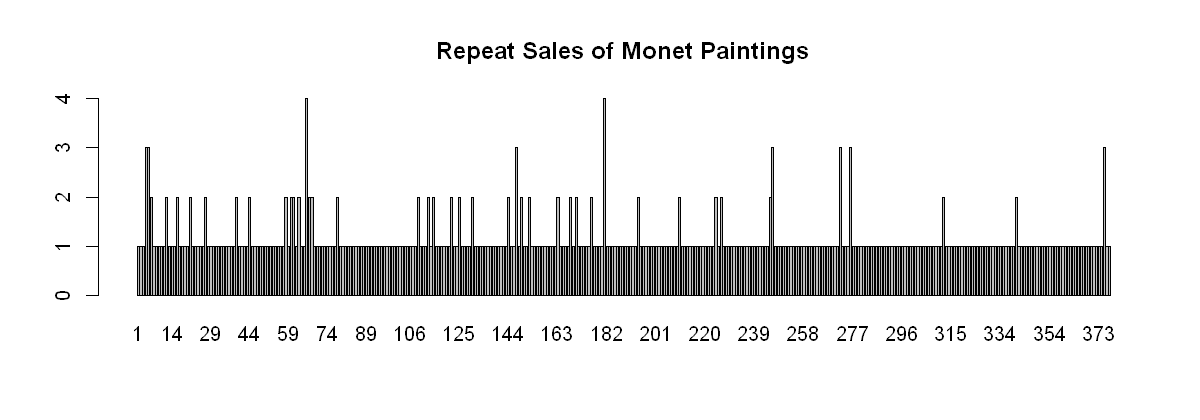

In [3]:
toggle()
monet <- read.csv(paste(datapath, 'TableF4-1.csv', sep=''))
mdl <- lm(log(price) ~ log(height*width) + I(width/height), data = monet)

vcv <- vcovHC(mdl, type = "HC1")
kable(vcv, caption = "Heteroskedasticity-Consistent Estimation of Covariance Matrix") %>%
    kable_styling(bootstrap_options="striped", full_width=F) %>%
    as.character() %>%
    display_html()

options(repr.plot.width=10, repr.plot.height=3.5)
barplot(table(monet$picture), main="Repeat Sales of Monet Paintings")

report <- coef(summary(mdl))[,c('Estimate', 'Std. Error')]
# include heteroscedasticity robust std. errors
heteroscedasticity <- coeftest(mdl, vcv)[,"Std. Error", drop=FALSE]
colnames(heteroscedasticity) <- c('Heteroscedasticity (Std. Error)')
report <- cbind(report, heteroscedasticity)
# include cluster robust std. errors with cluster on monet$picture
cluster <- coeftest(mdl, cluster.vcov(mdl, monet$picture))[, c('Std. Error'), drop=FALSE]
colnames(cluster) <- c('Cluster (Std. Error)')
report <- cbind(report, cluster)
kable(report, caption = "Robust Standard Errors") %>%
    kable_styling(bootstrap_options="striped", full_width=F) %>%
    as.character() %>%
    display_html()

## Model Estimation

### Frisch–Waugh–Lovell Theorem

Suppose that the regression involves two sets of variables $\mathbf{x} = (\mathbf{x}^1, \mathbf{x}^2)$. For example, $\mathbf{x}^1$ includes all variables (such as age, gender of individuals) that we want to control, and $\mathbf{x}^2$ are some key variables that we want to see their effects on the response $y$. Frisch–Waugh–Lovell Theorem suggests that 

> $b_2$ is partial regression coefficients that partialing out the effect of $\mathbf{x}^1$

because $b_2$ can be derived as follows:

1. regress $y$ on $\mathbf{x}^1$: $y \sim \mathbf{x}^1 + e^0$
2. regress $\mathbf{x}^2_j$ on $\mathbf{x}^1$: $\mathbf{x}^2_j \sim \mathbf{x}^1 + e^j$ $\forall j = 1, \ldots J$
3. regress $e^0$ on $e^1, \ldots, e^J$: then $e^0 = b^\top_2 (e^1 , \cdots , e^J) + \tilde{e}$

Table F3.1: U.S. Investment Data, 15 Yearly Observations, 2000-2014 <br>
Source: [Greene (2003)](http://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm)

- Year = Date,
- RealGNP = GNP Quantity Index,
- Invest = Nominal Investment in \$T,
- GNPDefl = GNP Deflator,
- Interest = Interest rate = Prime rate.
- Infl = Yearly change in consumer price index.
- Trend = row index
- RealInv = Nominal investment/(.01*GNP Deflator)

The model is `realinv ~ trend + realgnp + interest + infl`. The example demonstrates Frisch–Waugh–Lovell Theorem and partitioned regression. 

In [4]:
toggle()
invest <- read.csv(paste(datapath, 'TableF3-1.csv', sep=''))
mdl <- lm(realinv ~ trend + realgnp + interest + infl, invest)
coef(summary(mdl))
cat('coefficient of infl:', as.numeric(mdl$coef['infl']), '\n')
mdl1 <- lm(realinv ~ trend + realgnp + interest, invest)
mdl2 <- lm(infl ~ trend + realgnp + interest, invest)
mdl3 <- lm(resid(mdl1) ~ resid(mdl2))
coef(summary(mdl3))
cat('coefficient of infl from Frisch–Waugh–Lovell Theorem:\n', as.numeric(mdl3$coef[2]), '\n') 
cat('coefficient of infl from normal equation:\n', sum(resid(mdl1)*resid(mdl2))/sum(resid(mdl2)*resid(mdl2)), '\n')

show code

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.21967209,1.93044718,-3.2218815,0.009145929
trend,-0.16088526,0.04723546,-3.4060269,0.006702860
realgnp,0.09908417,0.02413202,4.1059206,0.002124363
interest,0.02017157,0.03369151,0.5987137,0.562679619
infl,-0.01165919,0.03976816,-0.2931789,0.775379223


coefficient of infl: -0.01165919 


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.125102e-17,0.03231890,-3.481250e-16,1.0000000
resid(mdl2),-1.165919e-02,0.03487898,-3.342754e-01,0.7435031


coefficient of infl from Frisch–Waugh–Lovell Theorem:
 -0.01165919 
coefficient of infl from normal equation:
 -0.01165919 


### Omitted Variable Bias

Suppose that 

- the correct regression model is $y = \beta \mathbf{x} + \gamma z + \epsilon$, but 
- the performed regression model is $y = \beta \mathbf{x} + \epsilon$.

So, we regress $y$ on $\mathbf{x}$ without including the relevant variable, $z$, then the estimator is

\begin{align*}
\text{E}(b^\prime|X) & = (X^\top X)^{-1} X^\top \text{E}(\mathbf{y}|X) \\
& = (X^\top X)^{-1} X^\top (\beta X + \mathbf{z} \gamma) \\
& = \beta + (X^\top X)^{-1} X^\top \mathbf{z} \gamma
\end{align*}

where $\mathbf{z} = \{z_1,\ldots,z_n\}$. The estimator $b^\prime$ is biased unless $X^\top \mathbf{z} = 0$. The variance is $\text{Var}(b^\prime|X) = \sigma^2 (X^\intercal X)^{-1}$. Note that this variance is around $\text{E}(b^\prime|X)$, not $\beta$. If we regress $y$ on $\mathbf{x}, z$ and use the correct regression model, the variance of $b_{X,\mathbf{z}}$ is

\begin{align*}
\text{Var}(b_{X,\mathbf{z}} | X, \mathbf{z}) = \sigma^2\left( X^\top X - X^\top \mathbf{z} (\mathbf{z}^\intercal \mathbf{z})^{-1}\mathbf{z}^\top X \right)^{-1}
\end{align*}

Hence,
\begin{align*}
\big(\text{Var}(b^\prime|X)\big)^{-1} - \big(\text{Var}(b_{X,\mathbf{z}} | X, \mathbf{z})\big)^{-1} = \frac{1}{\sigma^2} X^\top \mathbf{z} (\mathbf{z}^\top \mathbf{z})^{-1}\mathbf{z}^\top X \succeq 0
\end{align*}

Although $b^\prime$ is biased, its variance is never larger than the variance of the unbiased estimator.

However, suppose that

- the correct regression model is $y = \beta \mathbf{x} + \epsilon$, but 
- the performed regression model is $y = \beta \mathbf{x} + \gamma z + \epsilon$.

We have $\text{E}(b^{\prime \prime}|X) = \text{E}\big((b_x, b_z)|X\big) = (\beta, \gamma)$. So, including irrelevant variables in the estimation equation does not lead to bias in the estimation. 

The cost of including irrelevant variables is larger variances (less precision) of the estimators.

### Goodness of Fit

The goodness of fit
\begin{align*}
\text{R}^2 = 1 - \frac{e^\intercal e}{\sum_{i \in N} (y_i - \bar{y})^2}
\end{align*}

where $\bar{y}$ is the average of $y_i$ $\forall i \in N$. The proof that $0\le R^2 \le 1$ requires $X$ to contain a column of 1s, i.e., the constant term is in the model.

The ANOVA Table for a regression with constant term is 

| Source           | <div style="width:180px">Sum of Squares</div>| Degrees of Freedom |
| :--------------- | ---------------------------------------- | ----- |
| Regression (SSR) | $\sum_{i \in N} (\hat{y}_i - \bar{y})^2$ | $k-1$ |
| Residual (SSE)   | $e^\top e$                               | $n-k$ |
| Total (SST)      | $\sum_{i \in N} (y_i - \bar{y})^2$       | $n-1$ |

In [5]:
anova(mdl)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
trend,1,0.010309289,0.010309289,0.50615187,0.4930710459
realgnp,1,0.737973153,0.737973153,36.23203121,0.0001287546
interest,1,0.006172822,0.006172822,0.30306504,0.5940507297
infl,1,0.001750707,0.001750707,0.08595389,0.7753792228
Residuals,10,0.203679763,0.020367976,NA,NA


The anova  table can also be obtained by direct calculations.

In [6]:
sumsq = sum((lm(realinv ~ trend, invest)$fit - mean(invest$realinv))^2)
data.frame("sum sq for trend" = sumsq,
           'sum sq for residuals' = sum(mdl$resid^2),
           'F value' = sumsq/(sum(mdl$resid^2)/10), check.names = FALSE)

sum sq for trend,sum sq for residuals,F value
0.01030929,0.2036798,0.5061519


### Prediction

A common use of regression modeling is for prediction of the dependent variable. 

- ex post prediction (or ex post forecast): the data used in the regression equation to make the prediction are either observed or constructed experimentally by the analyst. 


- ex ante forecast (in the time-series context): it requires the analyst to forecast the independent variables first before it is possible to forecast the dependent variable.

The prediction $\hat{y}^0 = b^\top \mathbf{x}^0$ where the actual value is $y^0 = \beta^\top \mathbf{x}^0 + \epsilon^0$. The prediction error is $e^0 = \hat{y}^0 - y^0 = (b-\beta)^\top \mathbf{x}^0 - \epsilon^0$.

The **prediction interval** is constructed based on the variance

\begin{align*}
\\
\text{Var}(e^0|X, \mathbf{x}^0) = \sigma^2 + \text{Var}\big((b-\beta)^\top \mathbf{x}^0|X, \mathbf{x}^0\big) = \sigma^2 + (\mathbf{x}^0)^\top \big( \sigma^2 (X^\top X)^{-1} \big) \mathbf{x}^0
\end{align*}

The **confidence interval** is constructed based on the variance

\begin{align*}
\\
\text{Var}(\hat{y}^0 - \text{E}(y^0)|X, \mathbf{x}^0) = \text{Var}\big((b-\beta)^\top \mathbf{x}^0|X, \mathbf{x}^0\big) = (\mathbf{x}^0)^\top \big( \sigma^2 (X^\top X)^{-1} \big) \mathbf{x}^0
\end{align*}

***

Suppose the regression model describes $\ln y$. The natural approach for a predictor is $\ln y^0 = b^\top \mathbf{x}^0$ and $y^0 = \exp(b^\top \mathbf{x}^0)$. The problem is that $\text{E}(y^0|\mathbf{x}^0) \neq \exp \big(\text{E}(\ln y^0|\mathbf{x}^0) \big)$ and 
\begin{align*}
\text{E}(y^0|\mathbf{x}^0) = \text{E}(\exp(\beta^\top \mathbf{x}^0 + \epsilon^0)|\mathbf{x}^0) = \exp(\beta^\top \mathbf{x}^0)  \text{E}(\exp(\epsilon^0)|\mathbf{x}^0)
\end{align*}

The implication for normally distributed error terms would be that an appropriate predictor for the conditional mean would be
\begin{align*}
\\
\hat{y}^0 = \exp(b^\top \mathbf{x}^0 + s^2/2) > \exp(b^\top \mathbf{x}^0)
\end{align*}

***

The prediction interval can be $[b^\top \mathbf{x}^0 \pm \text{t-value } \times se(e^0)]$. However, this may not be the narrowest interval with given confidence level. The narrowest interval can be found by solving an optimization problem.

## Data Problems

### Multicollinearity

Multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated with one another. The exact linear relationship is fairly simple to spot because regression packages will typically respond with an error message. A more common and serious problem is multicollinearity, where explanatory variables are highly, but not exactly, correlated.

There are two types of multicollinearity:

- Structural multicollinearity is a mathematical artifact caused by creating new predictors from other predictors — such as, creating the predictor X2 from the predictor X.

- Data-based multicollinearity, on the other hand, is a result of a poorly designed experiment, reliance on purely observational data, or the inability to manipulate the system on which the data are collected.

Variance inflation factor (VIF) can be used to identify multicollinearity. The VIF for $x_i$ is defined as 1/(1 - R-square for $x_i$), where R-square for $x_i$ is the usual R-square value from regressing $x_i$ on all other explanatory variables. Example 4.11 in Greene (2003).

The multicollinearity can be reduced by using a small number of principal components constructed as linear combinations of the $k$ original variables. 

Table F4.2: The Longley Data, 15 Yearly Observations, 1947-1962 <br>
Source: [Example 4.11 in Greene (2003)](http://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm)

- Employ = Employment (1000s),
- Price = GNP deflator,
- GNP = Nominal GNP (millions),
- Armed = Armed forces,
- Year = Date.

The model is `employ ~ year + price + gnp + armed`. The data is notorious for severe multicollinearity. The results show the dramatic effect of dropping the last observation where year is 1962.

In [7]:
toggle()
longley <- read.csv(paste(datapath, 'TableF4-2.csv', sep=''))
head(longley)
mdl0 <- lm(employ ~ year + price + gnp + armed, longley[longley$year<1962,])
mdl1 <- lm(employ ~ year + price + gnp + armed, longley)
report <- cbind('1947-1961'=coef(summary(mdl0))[,c('Estimate')], 
                'VIF(1947-1961)' = c(NA, vif(mdl0)), 
                '1947-1962'=coef(summary(mdl1))[,c('Estimate')],
                'VIF(1947-1962)' = c(NA, vif(mdl1)))
report
mdl2 <- lm(year ~ price + gnp + armed, longley)
cat('VIF for year:', 1/(1-summary(mdl2)$r.squared))

show code

employ,price,gnp,armed,year
60323,83.0,234289,1590,1947
61122,88.5,259426,1456,1948
60171,88.2,258054,1616,1949
61187,89.5,284599,1650,1950
63221,96.2,328975,3099,1951
63639,98.1,346999,3594,1952


,1947-1961,VIF(1947-1961),1947-1962,VIF(1947-1962)
(Intercept),1.459415e+06,NA,1.169088e+06,NA
year,-7.217561e+02,121.533754,-5.764643e+02,143.463545
price,-1.811230e+02,87.346665,-1.976807e+01,75.670734
gnp,9.106778e-02,154.075397,6.439397e-02,132.463801
armed,-7.493705e-02,1.559474,-1.014525e-02,1.553191


VIF for year: 143.4635

Table F4.3: Movie Buzz Data (62 Observations) <br>
Source: [Example 4.12 in Greene (2003)](http://pages.stern.nyu.edu/~wgreene/Text/Edition7/tablelist8new.htm)

- Box = First run U.S. box office (\$),
- MPRating = MPAA Rating code, 1=G, 2=PG, 3=PG13, 4=R,
- Budget = Production budget (\$Mil),
- Starpowr = Index of star poser,
- Sequel = 1 if movie is a sequel, 0 if not,
- Action = 1 if action film, 0 if not,
- Comedy = 1 if comedy film, 0 if not,
- Animated = 1 if animated film, 0 if not,
- Horror = 1 if horror film, 0 if not,
- Addict = Trailer views at traileraddict.com,
- Cmngsoon = Message board comments at comingsoon.net,
- Fandango = Attention at fandango.com (see Example 4.12),
- Cntwait3 = Percentage of Fandango votes that can't wait to see.

The dependent variable is $\log(\text{box})$. We show that principal component variable `buzz` is a highly significant predictor of success. 

Let $Z = \text{colums of }(log(\text{Addict}), log(\text{Cmngsoon}), log(\text{Fandango}), \text{Cntwait3})$, $V$ be its sample correlation matrix, and $c_1$ be the eigenvector of $V$ associated with the largest eigenvalue. The variable `buzz` is defined as $Z c_1$.

In [8]:
toggle()
movie <- read.csv(paste(datapath, 'TableF4-3.csv', sep=''))
movie <- within(movie, mprating <- relevel(as.factor(mprating), ref=4))
mdl0 <- lm(log(box)~action+comedy+animated+horror+mprating+log(budget)+sequel+starpowr, movie)

Z <- data.matrix(scale(cbind(log(movie[,10:12]),'cntwait3'=movie[,13])))
V <- (t(Z) %*% Z)/(nrow(Z)-1)
c1 <- eigen(V)$vectors[,which.max(eigen(V)$values)]
movie$buzz <- Z %*% c1
mdl1 <- lm(log(box)~action+comedy+animated+horror+mprating+log(budget)+sequel+starpowr+buzz, movie)
ret <- cbind(coef(summary(mdl1))[,c('Estimate','Std. Error','t value')],
             rbind(coef(summary(mdl0))[,c('Estimate','Std. Error','t value')],rep(NA,3)))
ret <- rbind(ret, 'R-squared'=c(summary(mdl1)$r.squared, rep(NA,2), 
                                summary(mdl0)$r.squared, rep(NA,2)))
ret <- rbind(ret, 'resid'=c(sum(summary(mdl1)$resid^2), rep(NA,2), 
                            sum(summary(mdl0)$resid^2), rep(NA,2)))
ret

show code

,Estimate,Std. Error,t value,Estimate,Std. Error,t value
(Intercept),15.400213468,0.64273405,23.96047558,13.576811966,0.68824743,19.7266439
action,-0.869315939,0.29333401,-2.96357019,-0.306818320,0.34401299,-0.8918800
comedy,-0.016217801,0.25608384,-0.06333004,-0.038453159,0.32060923,-0.1199378
animated,-0.833237280,0.43022317,-1.93675595,-0.820317586,0.53868609,-1.5228119
horror,0.374599916,0.37109194,1.00945311,1.026439228,0.44007723,2.3324070
mprating1,0.384402032,0.55315049,0.69493210,0.252418678,0.69195645,0.3647898
mprating2,0.533586045,0.29976318,1.78002529,0.329695048,0.37243233,0.8852482
mprating3,0.215047402,0.21884853,0.98263122,0.071762221,0.27205875,0.2637747
log(budget),0.260878316,0.18529391,1.40791633,0.709142449,0.20811936,3.4073833
sequel,0.275054967,0.27312801,1.00705513,0.643679087,0.33143140,1.9421186


### Missing Values

There are a variety of data imputation methods to fill gaps in data sets:

- replacing each missing $x$ with $\bar{x}$ based on the observed data. It is equivalent to dropping the incomplete data, but has a lower $R^2$.
- adding a dummy column with 1 for missing observations and 0 otherwise.
- estimating its value by regressing on other dependent variables plus a random noise.

### Influential Observations

An influential observation is one that is likely to have a substantial impact on the least squares regression coefficient(s). 

Since OLS minimizes sum of squared residuals, an observation with $x$ value far from the $\text{avg}(x)$ may have huge influence on the estimation of $\beta$.  If we run regression, we may find the residual of this observation is not large (not an outlier).